<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson18.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-24-8wk-12.html#fifa23-데이터분석> 

<https://guebin.github.io/DV2022/posts/2022-10-30-9wk-1-mid.html#자료분석-및-시각화-i-40점-fifa22자료>

# imports

In [1]:
# !pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from plotnine import *

ModuleNotFoundError: No module named 'pandas_profiling'

# FIFA23 데이터분석

## FIFA23 data 

`-` FIFA23라는 축구게임이 있음 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 
- https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## 데이터살펴보기 

`-` 일단 살펴보기

In [16]:
df.loc[['Fernandes' in df.Name[i] for i in range(17660)],['Name','Overall']]

,Name,Overall
1,Bruno Fernandes,86
201,Gedson Fernandes,77
2061,E. Fernandes,71
2544,22 Rodrigo Fernandes,68
4523,Leandro Fernandes,61
5718,Joelson Fernandes,68
9707,S. Fernandes,60
10097,Rafael Fernandes,61
13090,21 D. Fernandes,53
14491,D. Fernandes,49


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


트랜스포즈하여 보는 것이 편할때도 있음 

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659
ID,209658,212198,224334,192985,224232,212622,197445,187961,208333,210514,...,256879,269546,267647,253186,267461,269526,267946,270567,256624,256376
Name,L. Goretzka,Bruno Fernandes,M. Acuña,K. De Bruyne,N. Barella,J. Kimmich,D. Alaba,22 Paulinho,E. Can,João Cancelo,...,22 G. Leijon,Wu Fei,22 E. Grosz,22 S. Booth,22 L. Grimpe,Deng Xiongtao,22 Lim Jun Sub,A. Demir,21 S. Czajor,21 F. Jakobsson
Age,27,27,30,31,25,27,30,32,28,28,...,19,32,18,20,17,19,17,25,18,20
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png,https://cdn.sofifa.net/players/192/985/23_60.png,https://cdn.sofifa.net/players/224/232/23_60.png,https://cdn.sofifa.net/players/212/622/23_60.png,https://cdn.sofifa.net/players/197/445/23_60.png,https://cdn.sofifa.net/players/187/961/22_60.png,https://cdn.sofifa.net/players/208/333/23_60.png,https://cdn.sofifa.net/players/210/514/23_60.png,...,https://cdn.sofifa.net/players/256/879/22_60.png,https://cdn.sofifa.net/players/269/546/23_60.png,https://cdn.sofifa.net/players/267/647/22_60.png,https://cdn.sofifa.net/players/253/186/22_60.png,https://cdn.sofifa.net/players/267/461/22_60.png,https://cdn.sofifa.net/players/269/526/23_60.png,https://cdn.sofifa.net/players/267/946/22_60.png,https://cdn.sofifa.net/players/270/567/23_60.png,https://cdn.sofifa.net/players/256/624/21_60.png,https://cdn.sofifa.net/players/256/376/21_60.png
Nationality,Germany,Portugal,Argentina,Belgium,Italy,Germany,Austria,Brazil,Germany,Portugal,...,Sweden,China PR,Romania,England,Germany,China PR,Korea Republic,Turkey,Poland,Sweden
Flag,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/flags/ar.png,https://cdn.sofifa.net/flags/be.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/at.png,https://cdn.sofifa.net/flags/br.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,...,https://cdn.sofifa.net/flags/se.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/ro.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/kr.png,https://cdn.sofifa.net/flags/tr.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/se.png
Overall,87,86,85,91,86,89,86,83,82,88,...,52,51,52,51,54,48,48,51,50,50
Potential,88,87,85,91,89,90,86,83,82,88,...,62,51,70,60,68,61,64,56,65,61
Club,FC Bayern München,Manchester United,Sevilla FC,Manchester City,Inter,FC Bayern München,Real Madrid CF,Al Ahli,Borussia Dortmund,Manchester City,...,Örebro SK,Wuhan Three Towns,Gaz Metan Mediaş,Crewe Alexandra,RB Leipzig,Meizhou Hakka,Jeju United FC,Ümraniyespor,Fleetwood Town,IFK Norrköping
Club Logo,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/11/30.png,https://cdn.sofifa.net/teams/481/30.png,https://cdn.sofifa.net/teams/10/30.png,https://cdn.sofifa.net/teams/44/30.png,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/243/30.png,https://cdn.sofifa.net/teams/112387/30.png,https://cdn.sofifa.net/teams/22/30.png,https://cdn.sofifa.net/teams/10/30.png,...,https://cdn.sofifa.net/teams/705/30.png,https://cdn.sofifa.net/teams/116361/30.png,https://cdn.sofifa.net/teams/112637/30.png,https://cdn.sofifa.net/teams/121/30.png,https://cdn.sofifa.net/teams/112172/30.png,https://cdn.sofifa.net/teams/114628/30.png,https://cdn.sofifa.net/teams/1478/30.png,https://cdn.sofifa.net/teams/113796/30.png,https://cdn.sofifa.net/teams/112260/30.png,https://cdn.sofifa.net/teams/702/30.png


`-` column이름조사 

In [5]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

- 이름에 space가 있어서 좀 거슬림

`-` 각 column 별로 자료형조사

In [6]:
pd.DataFrame({'colname':df.keys(), 'dtype':[df[key].dtype for key in df.keys()]})

,colname,dtype
0,ID,int64
1,Name,object
2,Age,int64
3,Photo,object
4,Nationality,object
5,Flag,object
6,Overall,int64
7,Potential,int64
8,Club,object
9,Club Logo,object


`-` 결측치조사 

In [7]:
pd.DataFrame({'colname':df.keys(), 
              'dtype':[df[key].dtype for key in df.keys()],
              'na':[df[key].isna().sum() for key in df.keys()]
             })

,colname,dtype,na
0,ID,int64,0
1,Name,object,0
2,Age,int64,0
3,Photo,object,0
4,Nationality,object,0
5,Flag,object,0
6,Overall,int64,0
7,Potential,int64,0
8,Club,object,211
9,Club Logo,object,0


(퀴즈) 열의선택: 결측치가 10000개 이상인 열을 보고싶다면? 

In [8]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

,Loaned From,Best Overall Rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17655,NaN,NaN
17656,NaN,NaN
17657,NaN,NaN
17658,NaN,NaN


`-` .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

`-` .describe(): 숫자들이 저장된 column에 대하여 기본통계량 조사

In [10]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


`-` pandas_profiling.ProfileReport()을 이용한 전체적인 조사 

In [15]:
# pandas_profiling.ProfileReport(df).to_file('fifa2023_reprot.html')

`-` 특정열을 중심으로 정렬하여 보기 

In [16]:
df.sort_values(by='Overall',ascending=False).reset_index()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,41,188545,R. Lewandowski,33,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,91,91,FC Barcelona,...,Yes,"<span class=""pos pos25"">ST","Jul 18, 2022",NaN,2025,185cm,81kg,€172.2M,9.0,NaN
1,124,165153,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,...,Yes,"<span class=""pos pos21"">CF","Jul 9, 2009",NaN,2023,185cm,81kg,€131.2M,9.0,NaN
2,3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
3,56,158023,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,...,Yes,"<span class=""pos pos23"">RW","Aug 10, 2021",NaN,2023,169cm,67kg,€99.9M,30.0,NaN
4,75,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,...,Yes,"<span class=""pos pos25"">ST","Jul 1, 2018",NaN,2025,182cm,73kg,€366.7M,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,15513,266751,22 Jung Ho Yeon,20,https://cdn.sofifa.net/players/266/751/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,45,53,GwangJu FC,...,No,"<span class=""pos pos29"">RES","Jan 20, 2022",NaN,2026,180cm,73kg,€145K,23.0,NaN
17656,16215,268279,22 J. Looschen,24,https://cdn.sofifa.net/players/268/279/22_60.png,Germany,https://cdn.sofifa.net/flags/de.png,44,47,SV Meppen,...,No,"<span class=""pos pos29"">RES","Mar 19, 2022",NaN,2026,178cm,78kg,€92K,42.0,NaN
17657,16042,255283,20 Kim Yeong Geun,22,https://cdn.sofifa.net/players/255/283/20_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,44,49,Gyeongnam FC,...,No,"<span class=""pos pos29"">RES","Jan 9, 2020",NaN,2020,174cm,71kg,€53K,43.0,NaN
17658,14634,269038,22 Zhang Wenxuan,16,https://cdn.sofifa.net/players/269/038/22_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,44,59,Guangzhou FC,...,No,"<span class=""pos pos29"">RES","May 1, 2022",NaN,2022,175cm,70kg,€239K,29.0,NaN


`-` 특정열을 중심으로 그룹화하여 보기 ($\star$)

In [17]:
df.Nationality.unique() # 데이터셋에 포함된 나라들 출력

array(['Germany', 'Portugal', 'Argentina', 'Belgium', 'Italy', 'Austria',
       'Brazil', 'Croatia', 'Serbia', 'Spain', 'Netherlands', 'France',
       'Colombia', 'England', 'Uruguay', 'Morocco', 'Egypt', 'Algeria',
       'Ukraine', 'United States', "Côte d'Ivoire", 'Poland', 'Chile',
       'Senegal', 'Central African Republic', 'Denmark', 'Nigeria',
       'Mexico', 'Turkey', 'Canada', 'Wales', 'Scotland', 'Romania',
       'Czech Republic', 'Ghana', 'Korea Republic',
       'Bosnia and Herzegovina', 'Mali', 'Slovakia', 'Armenia', 'Norway',
       'Switzerland', 'Cameroon', 'Peru', 'Jamaica', 'Zambia', 'Guinea',
       'Sweden', 'North Macedonia', 'Russia', 'Tunisia', 'Malta',
       'Angola', 'Republic of Ireland', 'Ecuador', 'Benin', 'Paraguay',
       'Montenegro', 'Australia', 'Comoros', 'Gabon', 'Iceland',
       'Slovenia', 'Japan', 'Israel', 'China PR', 'Venezuela', 'Liberia',
       'Greece', 'Bulgaria', 'Honduras', 'Saudi Arabia', 'Curacao',
       'Northern Ireland', 'Gu

In [18]:
df.groupby(by='Nationality')[['Overall']].agg({np.mean,len}).sort_values(('Overall', 'mean'),ascending=False)

Overall     
                            mean  len
Nationality                          
Philippines            74.000000    1
Namibia                72.000000    1
Mozambique             72.000000    2
Kuwait                 71.000000    1
Brazil                 70.556586  539
...                          ...  ...
San Marino             53.000000    1
China PR               52.230769  325
South Sudan            52.000000    5
India                  51.994681  188
Saint Kitts and Nevis  51.000000    1

[161 rows x 2 columns]

- groupby는 나중에 다시 설명 합니다. 

## 데이터정리하기

`-` 칼럼이름변경

In [19]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'), df.columns)), axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` 결측치제거 

In [20]:
df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,€218K,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,€188K,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,€142K,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,€214K,40.0


`-` Height, Weight의 자료형을 float형으로 수정하기 

In [21]:
df.assign(
    Height= list(map(lambda x: float(x[:-2]), df.Height)),
    Weight= list(map(lambda x: float(x[:-2]), df.Weight))
)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189.0,82.0,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179.0,69.0,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172.0,69.0,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181.0,70.0,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172.0,68.0,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190.0,78.0,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195.0,84.0,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190.0,82.0,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187.0,79.0,€214K,40.0,NaN


`-` Release Clause의 자료형을 float으로 수정하기 

In [22]:
df['Release Clause']

0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 17660, dtype: object

In [23]:
_f = lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000

In [24]:
_f('€157M')

157000000.0

In [25]:
_f('€131K')

131000.0

(시도1--실패)

In [26]:
list(map(_f,df['Release Clause']))

TypeError: 'float' object is not subscriptable

(시도1이 실패한 이유)

In [27]:
df['Release Clause'].isna().sum() # 이 column에는 1151개의 결측치가 존재

1151

(nan에 대한 예비학습)

In [28]:
df.loc[df['Release Clause'].isna(), 'Release Clause']

18       NaN
34       NaN
38       NaN
49       NaN
50       NaN
        ... 
17378    NaN
17386    NaN
17535    NaN
17590    NaN
17618    NaN
Name: Release Clause, Length: 1151, dtype: object

In [29]:
df.loc[18, 'Release Clause']

nan

In [30]:
pd.isna(df.loc[18, 'Release Clause'])

True

In [31]:
type(df.loc[18, 'Release Clause'])

float

In [32]:
df.loc[18, 'Release Clause'][-1]

TypeError: 'float' object is not subscriptable

(시도2--성공)

In [33]:
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df['Release Clause'])))\
.rename(columns={'ReleaseClause':'Release Clause'})

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,157000000.0,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,155000000.0,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,97700000.0,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,198900000.0,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,154400000.0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,218000.0,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,188000.0,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,142000.0,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,214000.0,40.0,NaN


(시도3--성공) 그냥 결측치를 제거하고 변형해도 무방.. 

In [34]:
df2 = df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df2['Release Clause'] = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df2['Release Clause']))
df2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,157000000.0,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,155000000.0,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,97700000.0,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,198900000.0,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,154400000.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,218000.0,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,188000.0,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,142000.0,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,214000.0,40.0


> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3) 몇 가지 전 처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음  

## 데이터분석+시각화

`-` Overall vs Potential 

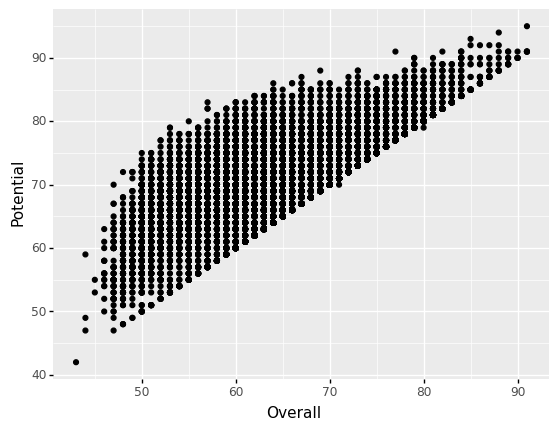

<ggplot: (8772275859669)>

In [35]:
ggplot(data=df) + geom_point(aes(x='Overall',y='Potential'))

- 뭔가 Potential > Overall 인 관계가 성립하는 듯 하다. $\to$ 우리가 생각하는 포텐셜의 의미는 사실 Potential2 = Potential - Overall 에 더 가깝다. $\to$  Potential2 = Potential - Overall 인 변수를 새로 만들고 시각화 해보자. 

`-` Potential2 = Potential - Overall 를 계산하여 새로운 열을 추가하자. 

In [36]:
df.eval('Potential2 = Potential - Overall')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN,1
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN,1
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN,0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN,0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN,13
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN,16
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN,5
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN,15


`-` 수정된 데이터프레임으로 다시 시각화를 하자.

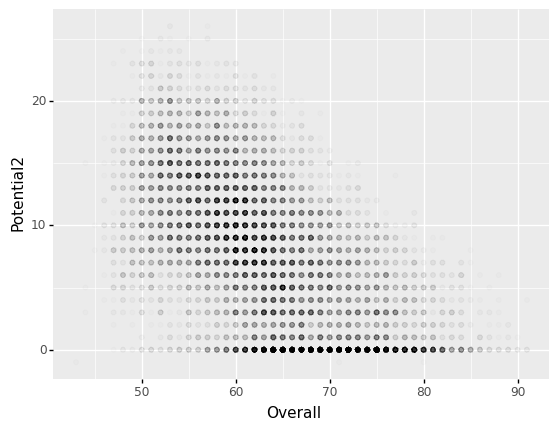

<ggplot: (8772307230189)>

In [37]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.01)

`-` 일부점들이 겹치므로 position = 'jitter'를 사용하여 점들을 흩뿌리자. 

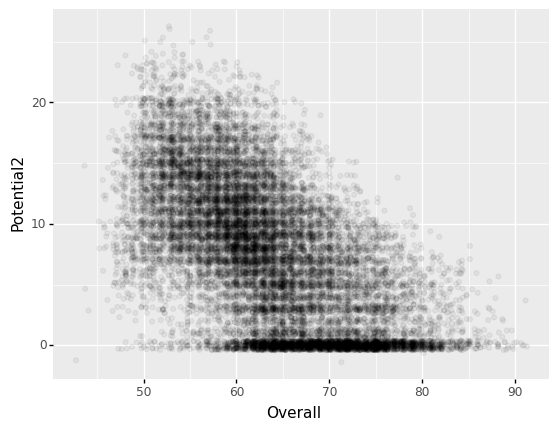

<ggplot: (8772275596573)>

In [38]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` 해석
- 해석1: Overall, Potential2는 음의 상관관계가 있다. 
- 해석2: 0근처에 데이터가 많음 $\to$ 이미 은퇴한 선수들이 아닐까? 
- 해석3: Overall의 값이 작을수록 Potential2의 분산이 크다. 

`-` 은퇴한 선수들은 제외하고 시각화하자. 

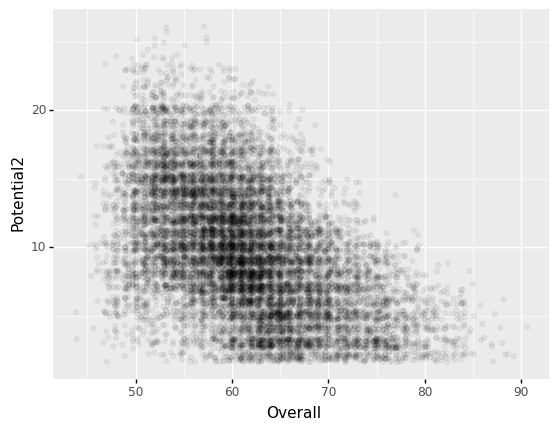

<ggplot: (8772275556513)>

In [39]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` Overall에 따라서 구간을 나누고 그 구간에 대응하는 boxplot을 그리자. 

In [40]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.Overall.describe()

count    13644.000000
mean        61.415347
std          7.247821
min         44.000000
25%         56.000000
50%         61.000000
75%         66.000000
max         91.000000
Name: Overall, dtype: float64

In [41]:
def f(x):
    if x>66: 
        y='66<'
    elif x>61:
        y='61~66'
    elif x>56:
        y='56~61'
    else:
        y='<56' 
    return y

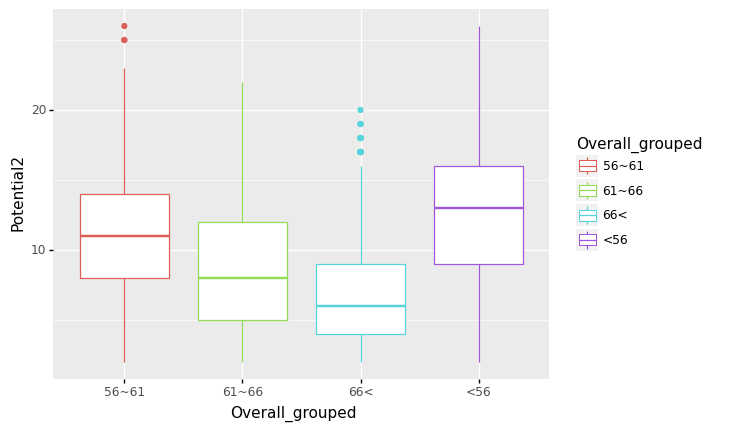

<ggplot: (8772275730901)>

In [42]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall))))\
    + geom_boxplot(aes(x='Overall_grouped',y='Potential2',color='Overall_grouped'))

- Overall_grouped = "<56" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "<56" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "56\~61" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "56\~61" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "61\~66" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "61\~66" 에 대응하는 박스플랏의 x축위치로 설정 

- Overall_grouped = "66<" 에 대응하는 점들을 모두 뽑아서 mean(Overall)를 계산하고 그 값을 Overall_grouped = "66<" 에 대응하는 박스플랏의 x축위치로 설정 

In [43]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.query("Overall_grouped == '66<'").Overall.mean()

71.8127687727423

(방법1)

In [44]:
def g(x):
    if x=='66<': 
        y= 71.8127687727423
    elif x=='61~66':
        y= 63.773918342474104
    elif x=='56~61':
        y= 59.155840684309005
    else:
        y= 52.87743190661479
    return y

In [45]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2,Overall_grouped,Overall_x
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3,66<,71.812769
10,228251,L. Pellegrini,26,https://cdn.sofifa.net/players/228/251/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,84,87,Roma,https://cdn.sofifa.net/teams/52/30.png,...,NaN,2026,186cm,77kg,€97.6M,7.0,NaN,3,66<,71.812769
13,225193,Merino,26,https://cdn.sofifa.net/players/225/193/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,86,Real Sociedad,https://cdn.sofifa.net/teams/457/30.png,...,NaN,2025,189cm,83kg,€102.2M,8.0,NaN,3,66<,71.812769
17,228702,F. de Jong,25,https://cdn.sofifa.net/players/228/702/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,NaN,2026,180cm,74kg,€247.6M,21.0,NaN,5,66<,71.812769
21,231281,T. Alexander-Arnold,23,https://cdn.sofifa.net/players/231/281/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,87,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,...,NaN,2025,180cm,69kg,€193.5M,66.0,NaN,3,66<,71.812769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,NaN,2027,190cm,78kg,€218K,35.0,NaN,13,<56,52.877432
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,NaN,2026,195cm,84kg,€188K,21.0,NaN,16,<56,52.877432
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,NaN,2023,190cm,82kg,€142K,12.0,NaN,5,<56,52.877432
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,NaN,2021,187cm,79kg,€214K,40.0,NaN,15,<56,52.877432


In [46]:
df2= df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))
df2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Potential2,Overall_grouped,Overall_x
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,NaN,2026,172cm,68kg,€154.4M,23.0,NaN,3,66<,71.812769
10,228251,L. Pellegrini,26,https://cdn.sofifa.net/players/228/251/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,84,87,Roma,https://cdn.sofifa.net/teams/52/30.png,...,NaN,2026,186cm,77kg,€97.6M,7.0,NaN,3,66<,71.812769
13,225193,Merino,26,https://cdn.sofifa.net/players/225/193/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,86,Real Sociedad,https://cdn.sofifa.net/teams/457/30.png,...,NaN,2025,189cm,83kg,€102.2M,8.0,NaN,3,66<,71.812769
17,228702,F. de Jong,25,https://cdn.sofifa.net/players/228/702/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,...,NaN,2026,180cm,74kg,€247.6M,21.0,NaN,5,66<,71.812769
21,231281,T. Alexander-Arnold,23,https://cdn.sofifa.net/players/231/281/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,87,90,Liverpool,https://cdn.sofifa.net/teams/9/30.png,...,NaN,2025,180cm,69kg,€193.5M,66.0,NaN,3,66<,71.812769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,NaN,2027,190cm,78kg,€218K,35.0,NaN,13,<56,52.877432
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,NaN,2026,195cm,84kg,€188K,21.0,NaN,16,<56,52.877432
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,NaN,2023,190cm,82kg,€142K,12.0,NaN,5,<56,52.877432
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,NaN,2021,187cm,79kg,€214K,40.0,NaN,15,<56,52.877432


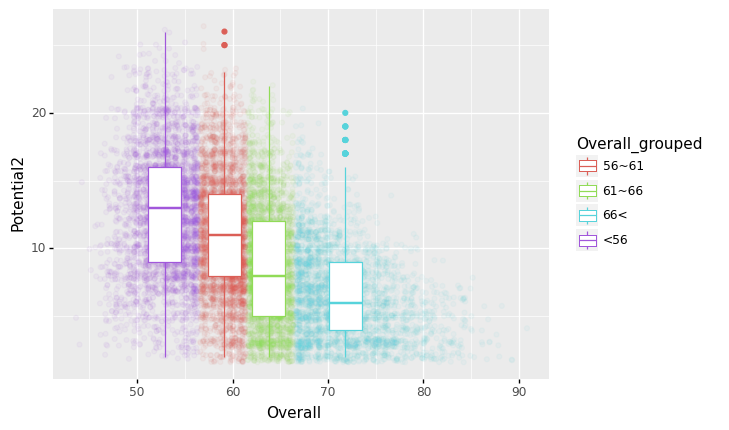

<ggplot: (8772275710537)>

In [47]:
ggplot(data=df2)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

(방법2)

In [48]:
_df = df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))

In [49]:
df3=_df.groupby(by="Overall_grouped").agg({'Overall':np.mean}).reset_index()\
.rename(columns={'Overall':'Overall_x'}).merge(_df)

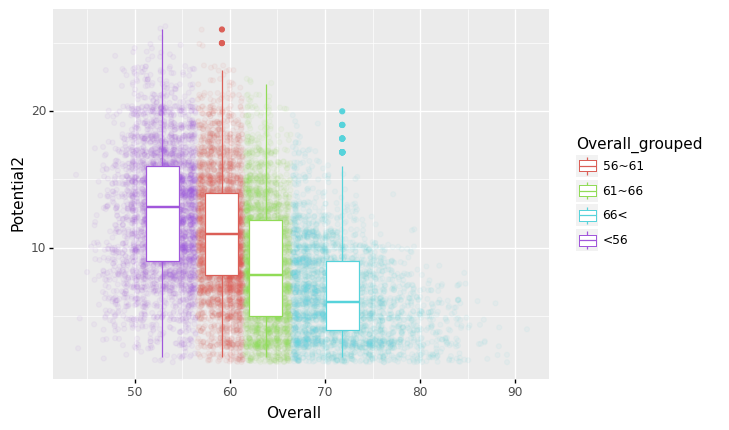

<ggplot: (8772275671993)>

In [50]:
ggplot(data=df3)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

# FIFA22 데이터분석

데이터시각화 중간고사문제에서 발췌

아래의 코드를 활용하여 FIFA22의 자료를 불러온뒤 물음에 답하라.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


`(1)` 연령별로 선수들의 잠재력을 시각화하고 싶다. 여기에서 잠재력은 아래의 수식의 Potential2를 의미한다. 

```
Potential2 = Potential - Overall
```

아래의 세부지침에 맞추어 연령별 Potential2의 산점도와 boxplot을 그려라. -- (10점)

**(세부지침)**

**step1**: 결측치가 가장 많은 2개의 컬럼을 찾고 이를 제거하라. 

**step2**: dropna()를 이용하여 결측치를 제거하라. 

**step3**: Potential2 = Potential - Overall 를 이용하여 Potential2를 구하라. 

**step4**: 구간 [0,20,22,26,100]를 설정하고 이를 기준으로 Age를 그룹화하라. (총 4개의 그룹으로 나누어져야 한다) 

**step5**: 그룹화된 Age를 x축으로, Potential2를 y축으로, 색깔을 그룹화된 Age로 설정한 뒤 산점도와 박스플랏을 겹쳐그려라. 
- 산점도의 파라메터: alpha=0.5,size=0.1,position='jitter'
- 박스플랏의 파라메터: alpha=0.8 

(풀이)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

- 'Loaned From'와 'Marking'이 가장 결측치가 많이 포함되어있음 

In [39]:
data1= df.drop(columns=['Loaned From', 'Marking']).dropna()\
.eval('Potential2 = Potential- Overall')\
.assign(Age = lambda df: pd.cut(df['Age'],[0,20,22,26,100]))
data1 

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2
0,212198,Bruno Fernandes,"(22, 26]",https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,1
1,209658,L. Goretzka,"(22, 26]",https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,1
2,176580,L. Suárez,"(26, 100]",https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,0
3,192985,K. De Bruyne,"(26, 100]",https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0
4,224334,M. Acuña,"(26, 100]",https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,"(0, 20]",https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0,14
16704,251433,B. Voll,"(0, 20]",https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0,11
16706,262846,�. Dobre,"(0, 20]",https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0,10
16707,241317,21 Xue Qinghao,"(0, 20]",https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0,13


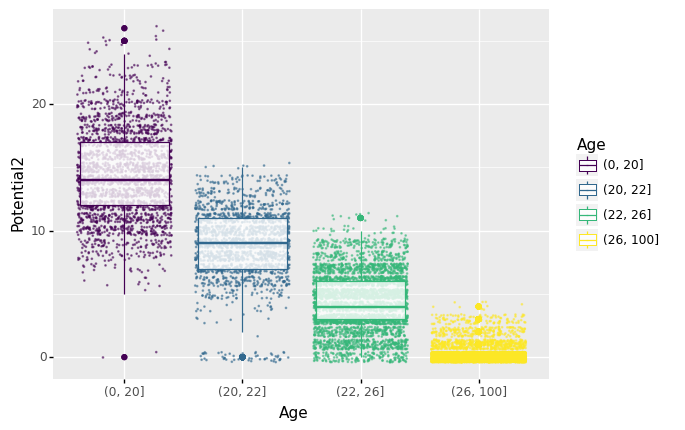

<ggplot: (8776319269061)>

In [73]:
fig = ggplot(data=data1)
scatter = geom_point(aes(x='Age',y='Potential2',colour='Age'),alpha=0.5,size=0.1,position='jitter')
boxplot = geom_boxplot(aes(x='Age',y='Potential2',colour='Age'),alpha=0.8)
fig+scatter+boxplot

- 채점기준: Age의 Label을 사용하지 않아도 만점으로 인정함. 

`(2)` 포지션별로 선수들의 능력치와 Wage를 시각화하고 싶다. 아래의 dictionary를 이용하여 Position을 재정의하라. 

In [45]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

아래의 세부지침에 맞추어 포지션별 ShotPower와 SlidingTackle의 산점도를 그려라. -- (30점)

**세부지침**

**step1**: 결측치가 가장 많은 2개의 컬럼을 찾고 이를 제거하라. 

**step2**: dropna()를 이용하여 결측치를 제거하라. 

**step3**: hint1과 position_dict을 참고하여 Position을 적절하게 변환하라. (변환된 값을 Position으로 저장할 것)

**step4**: hint2를 참고하여 Wage를 적절하게 변환하라. (변환된 값을 Wage에 저장할 것)

**step5**: Position=="DEFENDER" or Position=="FORWARD"에 해당하는 관측치를 고른 뒤 x축에 ShotPower, y축에 SlidingTackle 을 시각화하라. Position은 color로 구분하고 Wage는 size와 alpha로 구분하라. 

**hint1**: Position column의 변환을 위한 코드

In [46]:
'<span class="pos pos18">CAM'.split('>')

['<span class="pos pos18"', 'CAM']

**hint2**: Wage column의 변환을 위한 함수 

In [47]:
def f(x):
    if x[-1] == 'K' :
        y= float(x[1:-1])*1000
    elif x[-1] == 'M' : 
        y= float(x[1:-1])*1000000
    else:
        y= 0 
    return y 

(풀이)

In [92]:
data2=df.drop(columns=['Loaned From', 'Marking']).dropna()\
.assign(Wage = lambda df: list(map(f,df['Wage'])))\
.assign(Position = lambda df: list(map(lambda x: x.split('>')[-1], df.Position)))\
.assign(Position = lambda df: 
        [key for x in df.Position for key in position_dict if x in position_dict[key]]
       )
data2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


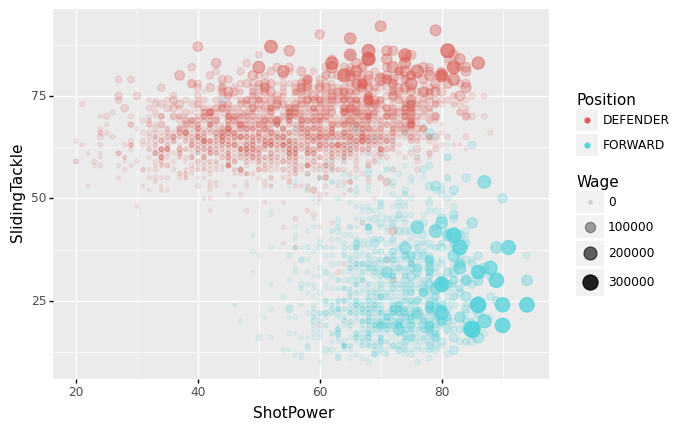

<ggplot: (8776325574701)>

In [50]:
fig = ggplot(data=data2.query('Position=="DEFENDER" or Position=="FORWARD"'))
scatter = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'))
fig+scatter

- 채점기준: df['Position']이 아니라 df['Best Position']을 이용하여 자료를 변형하고 시각화 하는 경우 부분점수 없이 0점임 